In [17]:
!pip install wordcloud

**Importing the Libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()

**Reading the dataset**

In [5]:
data = pd.read_csv('train.csv')

**Counting Sincere and Insincere Questions**

In [6]:
count = data['target'].value_counts()
count

0    1225312
1      80810
Name: target, dtype: int64

**Inference : There are about 12.25 lakh samples of Sincere Questions and around 80 thousand samples of Insincere Questions.**

**Bar Plot**

<Axes: xlabel='Target', ylabel='count'>

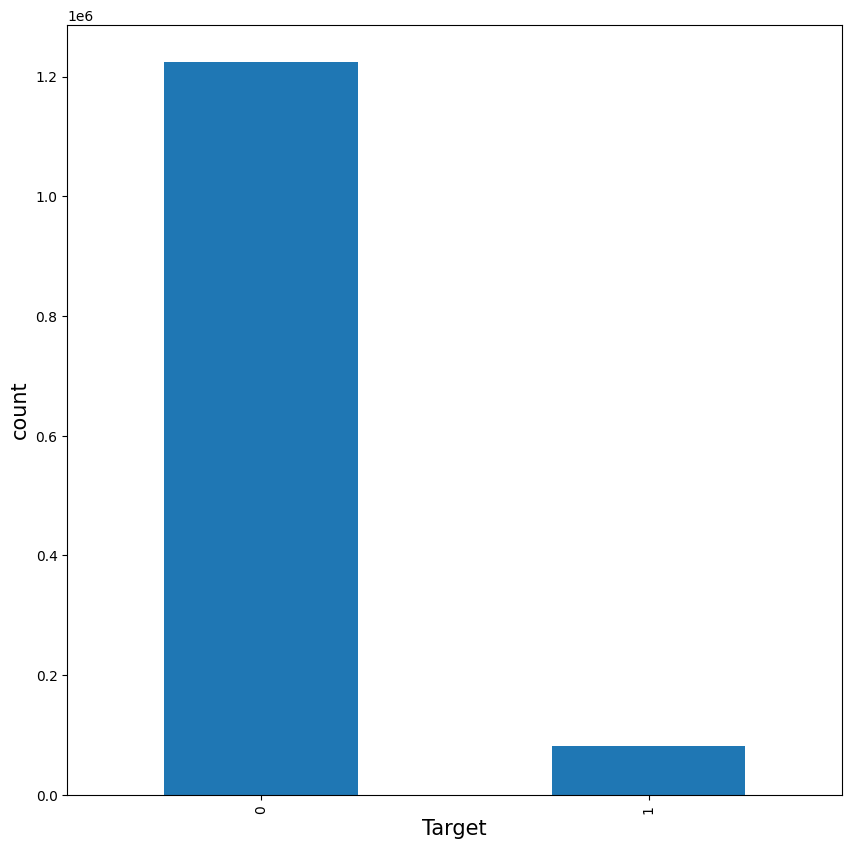

In [4]:
plt.figure(figsize=(10,10))
plt.xlabel('Target', fontsize=15)
plt.ylabel('count', fontsize=15)
count.plot(kind="bar")

**Calculating the Percentage of Insincere Questions**

In [9]:
insincere_ques = round(data['target'].mean()*100,2)

In [10]:
insincere_ques

6.19

**Inference : Percentage of Insincere Questions (target = 1) is 6.19%**

**Calculating the Percentage of Sincere Questions**

In [11]:
sincere_ques = 100 - round(data['target'].mean()*100,2)

In [12]:
sincere_ques

93.81

**Inference : Percentage of Sincere Questions (target = 1) is 93.81 %**

The percentages of Sincere and Insincere Questions are :  [93.81298224821265, 6.187017751787352]


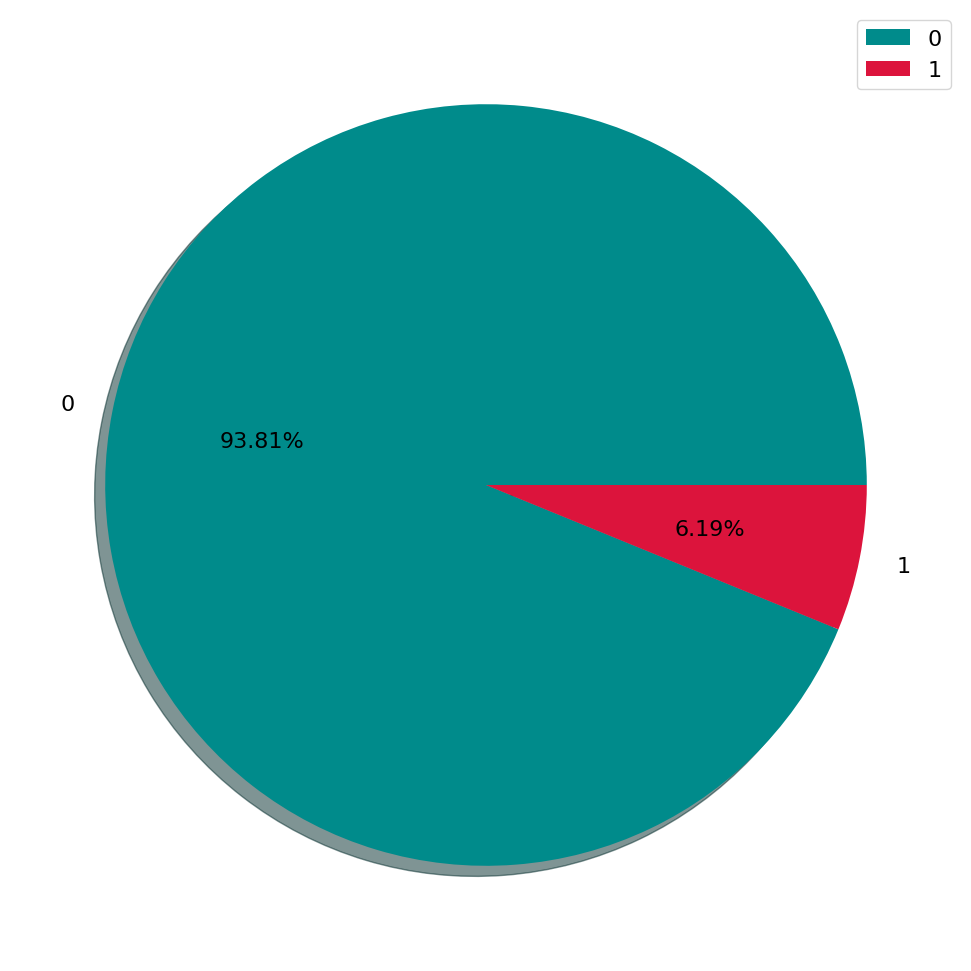

In [7]:
plt.rcParams['figure.figsize'] = [10, 10]

count = data['target'].value_counts()
labels = list(count.index)
agg = list(count.values)
percentage = [(x*100)/sum(agg) for x in agg]
print ("The percentages of Sincere and Insincere Questions are : ", percentage)

plt.rcParams.update({'font.size': 16})
explode = (0, 0.1)
plt.pie(agg, labels = labels, autopct='%1.2f%%', shadow=True, colors = ['darkcyan', 'crimson'])
plt.legend(labels, loc = 'best')
plt.tight_layout()
plt.show()


**Question Length**

In [10]:
def question_size(question):
    return len(question.split(" "))

data['question_size'] = data["question_text"].apply(question_size)

(array([0.00000e+00, 3.00000e+00, 7.30000e+01, 6.23100e+03, 2.22290e+04,
        4.39360e+04, 7.58630e+04, 1.04838e+05, 1.22459e+05, 1.24196e+05,
        1.16193e+05, 1.00558e+05, 8.65600e+04, 7.26360e+04, 6.06910e+04,
        5.04140e+04, 4.26630e+04, 3.64640e+04, 3.07390e+04, 2.62070e+04,
        2.27230e+04, 1.99340e+04, 1.73960e+04, 1.58340e+04, 1.37350e+04,
        1.21250e+04, 1.08630e+04, 9.18700e+03, 7.89200e+03, 6.78300e+03,
        5.56500e+03, 4.85800e+03, 4.09100e+03, 3.55000e+03, 3.23200e+03,
        3.00500e+03, 2.77500e+03, 2.44400e+03, 2.36800e+03, 2.26000e+03,
        2.07500e+03, 1.93200e+03, 1.69100e+03, 1.44100e+03, 1.12700e+03,
        1.02900e+03, 8.76000e+02, 6.41000e+02, 5.18000e+02, 4.13000e+02,
        2.67000e+02, 2.19000e+02, 1.21000e+02, 8.10000e+01, 4.80000e+01,
        3.30000e+01, 2.10000e+01, 5.00000e+00, 3.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00

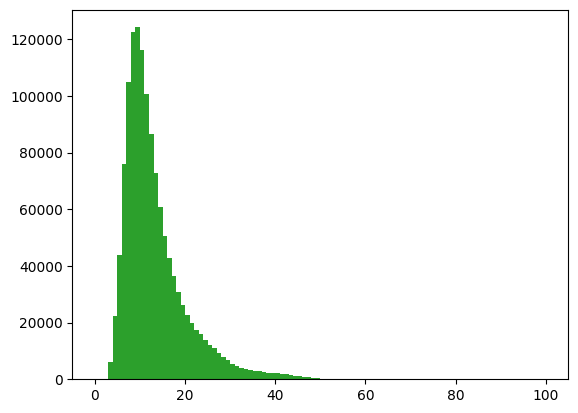

In [30]:
plt.hist(data.question_size, bins=100, range=[0, 100], color=pal[2],label='train')

**Inference : Mostly questions have length in range (10-20)**

**Word Cloud to see which words appear a lot in Insincere and Sincere Questions**

In [19]:
sincere_data = data[data['target']==0]

In [20]:
sincere_data.shape

(1225312, 3)

(-0.5, 999.5, 999.5, -0.5)

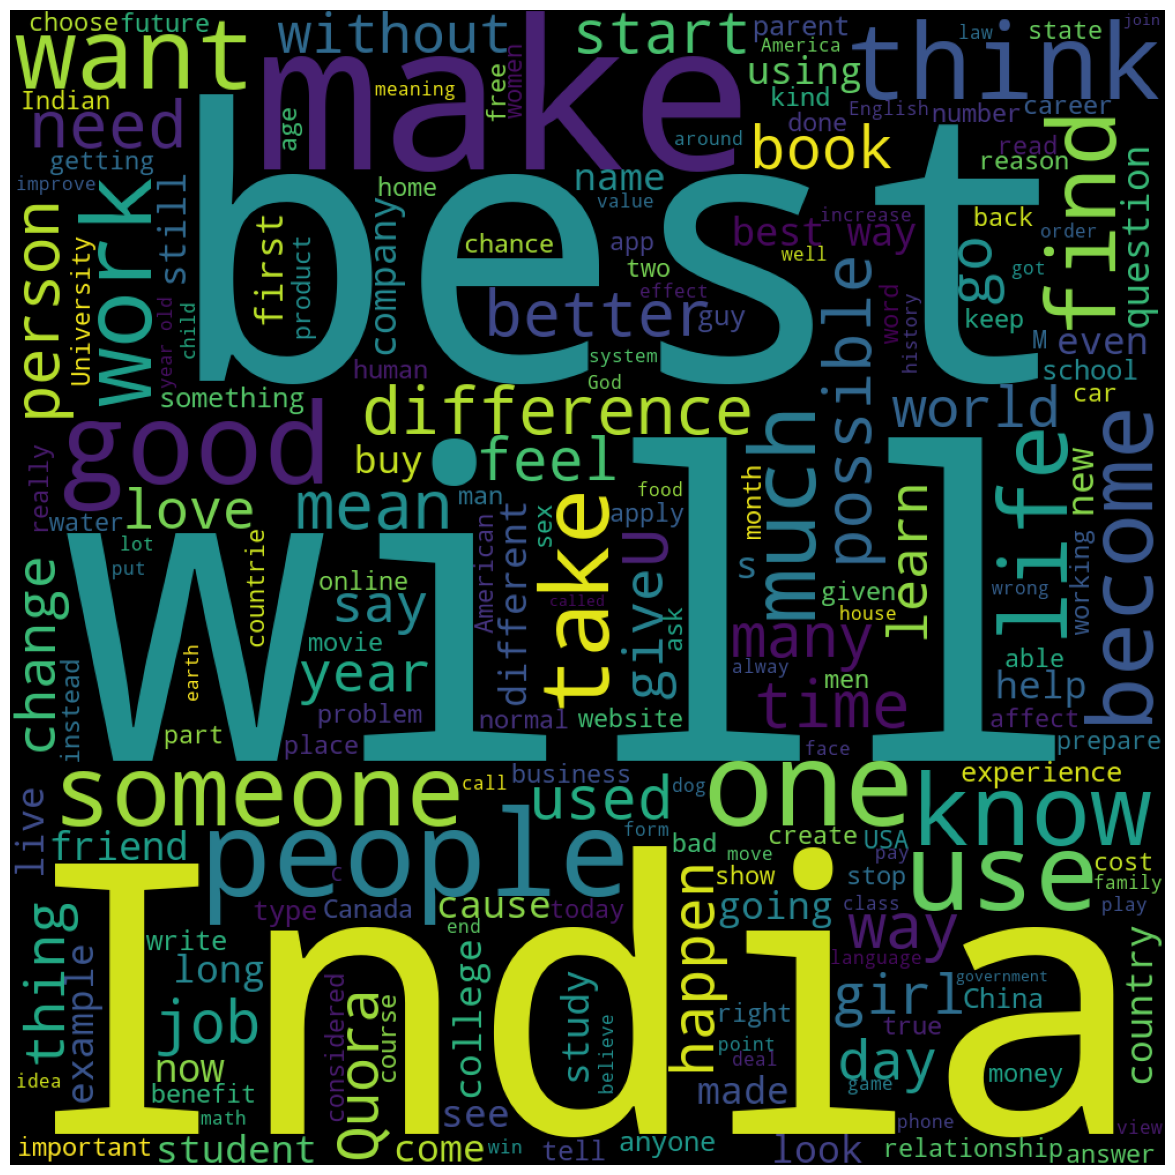

In [18]:
from wordcloud import WordCloud
sincere_data = data[data['target']==0]
cloud = WordCloud(width=1000, height=1000).generate(" ".join(sincere_data.question_text.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

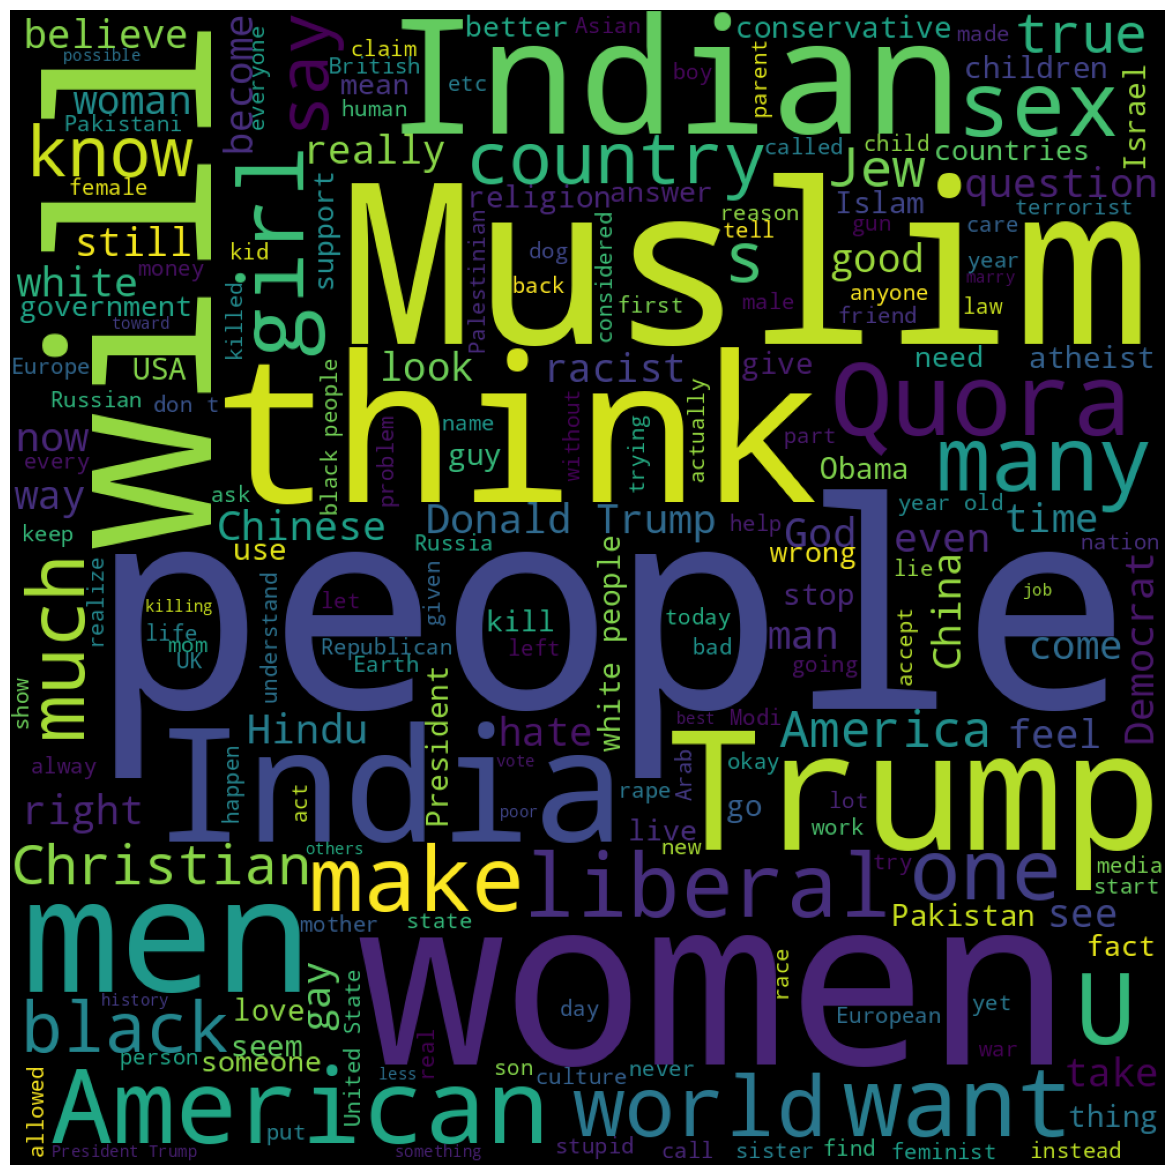

In [22]:
insincere_data = data[data['target']==1]
cloud = WordCloud(width=1000, height=1000).generate(" ".join(insincere_data.question_text.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

**Inference : From the wordcloud we can see that Muslim, Trump, Black, Indian etc are the words that appear a lot in Insincere questions.**

**Number of Unique words in the text**

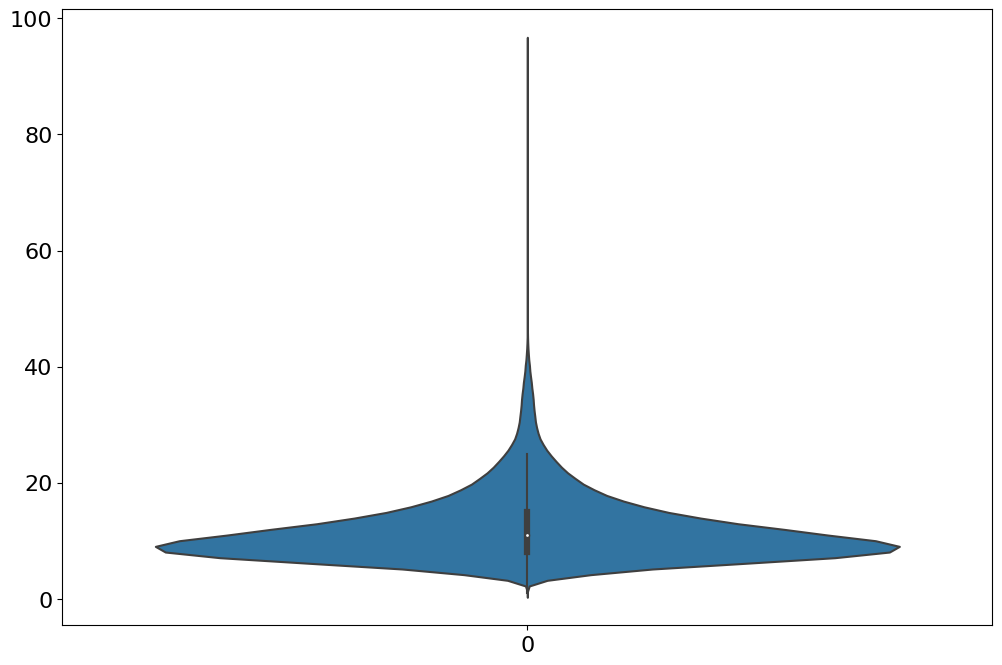

In [14]:
data["num_unique_words"] = data["question_text"].apply(lambda x: len(set(str(x).split())))
plt.figure(figsize=(12,8))
sns.violinplot(data=data['num_unique_words'])
plt.show()

**Average length of the words in the text**

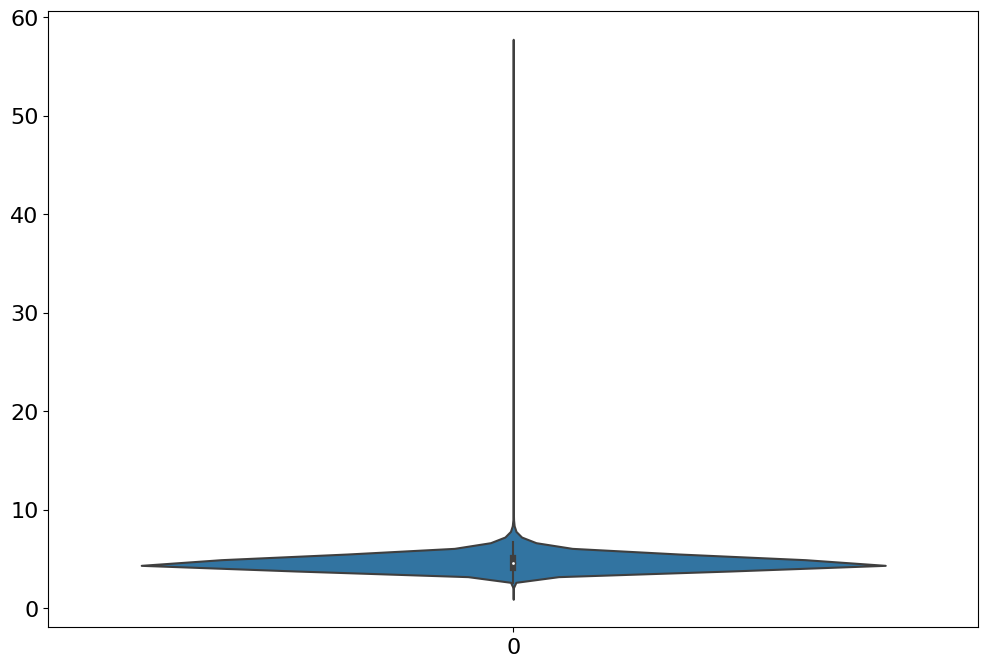

In [16]:
data["mean_word_len"] = data["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
plt.figure(figsize=(12,8))
sns.violinplot(data=data['mean_word_len'])
plt.show()